# Task-5 Decision Tree Implementation

## Question 2

Q2. Generate your dataset using the given lines of code.

a) Show the usage of *your decision tree* on the above dataset. The first 70% of the data should be used for training purposes and the remaining 30% for test purposes. Show the accuracy, per-class precision and recall of the decision tree you implemented on the test dataset.

b) Use 5 fold cross-validation on the dataset. Using nested cross-validation find the optimum depth of the tree.

> You should be editing `classification-exp.py` for the code containing the above experiments.

## The complete code is also available in `classification-exp.py`

### Importing required libraries

In [1]:
import sys
import os

# Add the path to the directory containing tree.py
sys.path.append(os.path.abspath("../"))

sys.path.append(os.path.abspath("../"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from classification_exp import *


np.random.seed(42)



# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Q2 a)

Q2 b)


### Creating dataset using the code provided

Shape of X: (100, 2)
Shape of y: (100,)


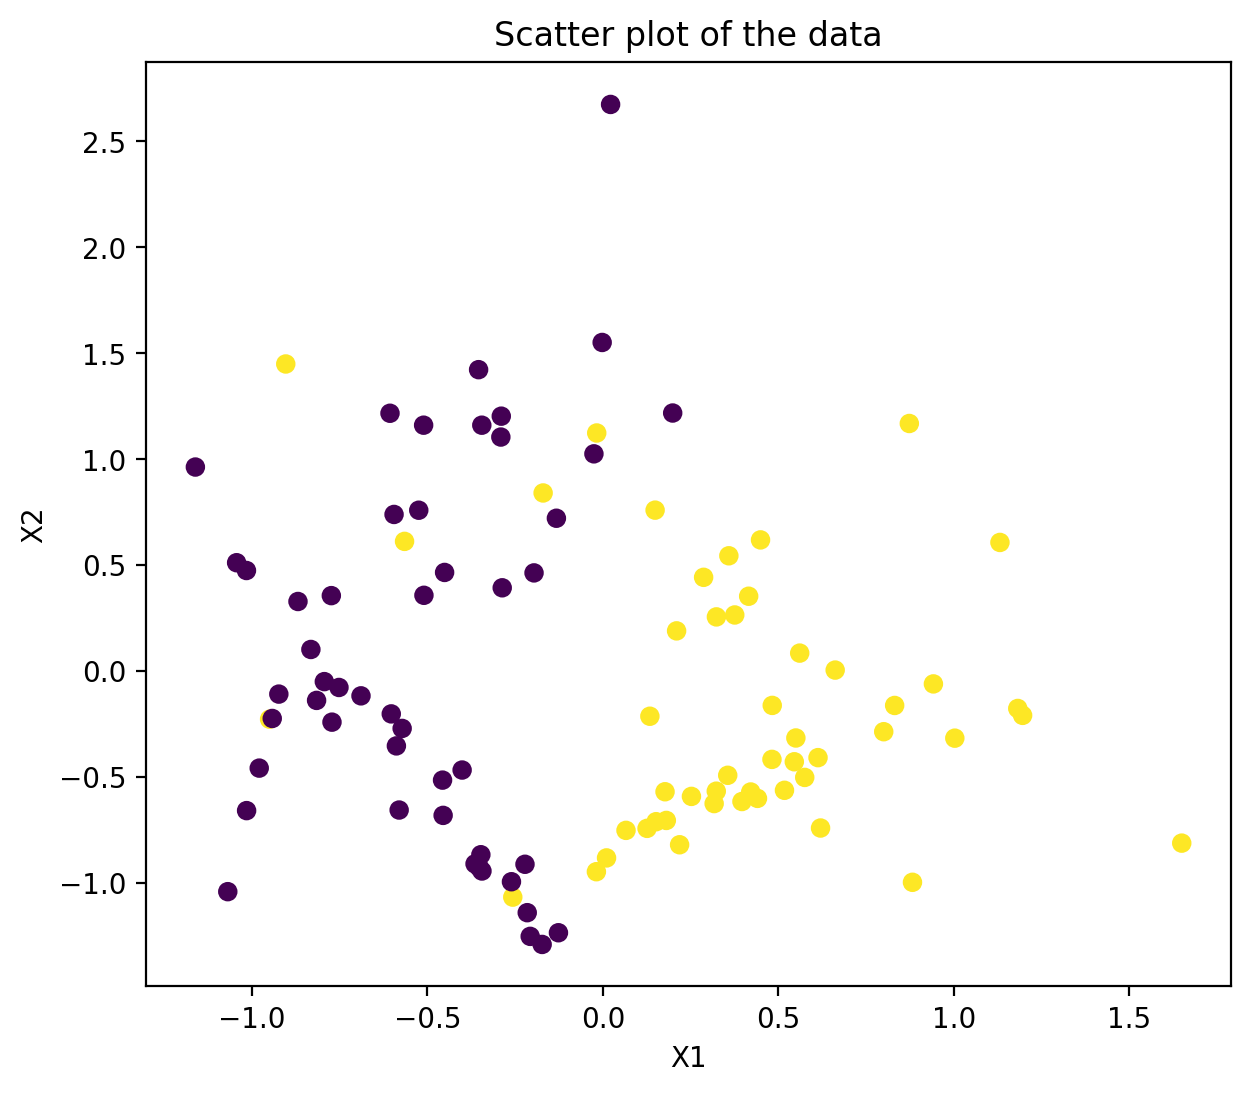

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# For plotting
plt.figure(figsize=(7, 6))
plt.title('Scatter plot of the data')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


#### a) Show the usage of *your decision tree* on the above dataset. The first 70% of the data should be used for training purposes and the remaining 30% for test purposes. Show the accuracy, per-class precision and recall of the decision tree you implemented on the test dataset.



In [3]:
X = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
y = pd.Series(y)

split = int(0.7 * X.shape[0])
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 2)
Shape of X_test: (30, 2)
Shape of y_train: (70,)
Shape of y_test: (30,)


#### Using our implemented decision tree to train and predict data

In [4]:
# Training the model
model = DecisionTree(criterion='information_gain', max_depth=5)
model.fit(X_train, y_train)

# Predicting the values
y_pred = model.predict(X_test)

print("Criteria :", "Information Gain")
print("Accuracy :", np.round(accuracy(y_test, y_pred),4))
for features in np.unique(y_test):
    print(f"Precision for class {features} :", np.round(precision(y_test, y_pred, features),4))
    print(f"Recall for class {features} :", np.round(recall(y_test, y_pred, features),4))

Criteria : Information Gain
Accuracy : 0.8667
Precision for class 0 : 0.75
Recall for class 0 : 0.9
Precision for class 1 : 0.9444
Recall for class 1 : 0.85


### b) Use 5 fold cross-validation on the dataset. Using nested cross-validation find the optimum depth of the tree.

In [5]:
k_fold_cross_validation(X, y, DecisionTree, folds=5, criterion='information_gain', max_depth=5)

Fold 1/5
Criteria : information_gain
Accuracy : 0.8
Fold 2/5
Criteria : information_gain
Accuracy : 0.9
Fold 3/5
Criteria : information_gain
Accuracy : 0.85
Fold 4/5
Criteria : information_gain
Accuracy : 0.8
Fold 5/5
Criteria : information_gain
Accuracy : 0.95

Average Accuracy: 0.86


### Nested Cross Validation

In [6]:
final_results, outer_folds, hyperparameters = nested_cross_validation(X, y)

Outer Fold: 1, Inner Fold: 1
Outer Fold: 1, Inner Fold: 2
Outer Fold: 1, Inner Fold: 3
Outer Fold: 1, Inner Fold: 4
Outer Fold: 1, Inner Fold: 5
Outer Fold: 2, Inner Fold: 1
Outer Fold: 2, Inner Fold: 2
Outer Fold: 2, Inner Fold: 3
Outer Fold: 2, Inner Fold: 4
Outer Fold: 2, Inner Fold: 5
Outer Fold: 3, Inner Fold: 1
Outer Fold: 3, Inner Fold: 2
Outer Fold: 3, Inner Fold: 3
Outer Fold: 3, Inner Fold: 4
Outer Fold: 3, Inner Fold: 5
Outer Fold: 4, Inner Fold: 1
Outer Fold: 4, Inner Fold: 2
Outer Fold: 4, Inner Fold: 3
Outer Fold: 4, Inner Fold: 4
Outer Fold: 4, Inner Fold: 5
Outer Fold: 5, Inner Fold: 1
Outer Fold: 5, Inner Fold: 2
Outer Fold: 5, Inner Fold: 3
Outer Fold: 5, Inner Fold: 4
Outer Fold: 5, Inner Fold: 5


In [7]:
final_results

,outer_fold,inner_fold,max_depth,criterion,validation_accuracy
0,0,0,1,information_gain,0.8125
1,0,0,1,gini_index,0.8125
2,0,0,2,information_gain,0.9375
3,0,0,2,gini_index,0.9375
4,0,0,3,information_gain,0.9375
...,...,...,...,...,...
495,4,4,8,gini_index,0.6875
496,4,4,9,information_gain,0.6875
497,4,4,9,gini_index,0.6875
498,4,4,10,information_gain,0.6875


Best Depths:  {'information_gain': [2, 1, 3, 2, 2], 'gini_index': [2, 1, 3, 2, 2]}
Mean Best Depth: 
Criterion: information_gain, Mean Best Depth: 2.0
Criterion: gini_index, Mean Best Depth: 2.0


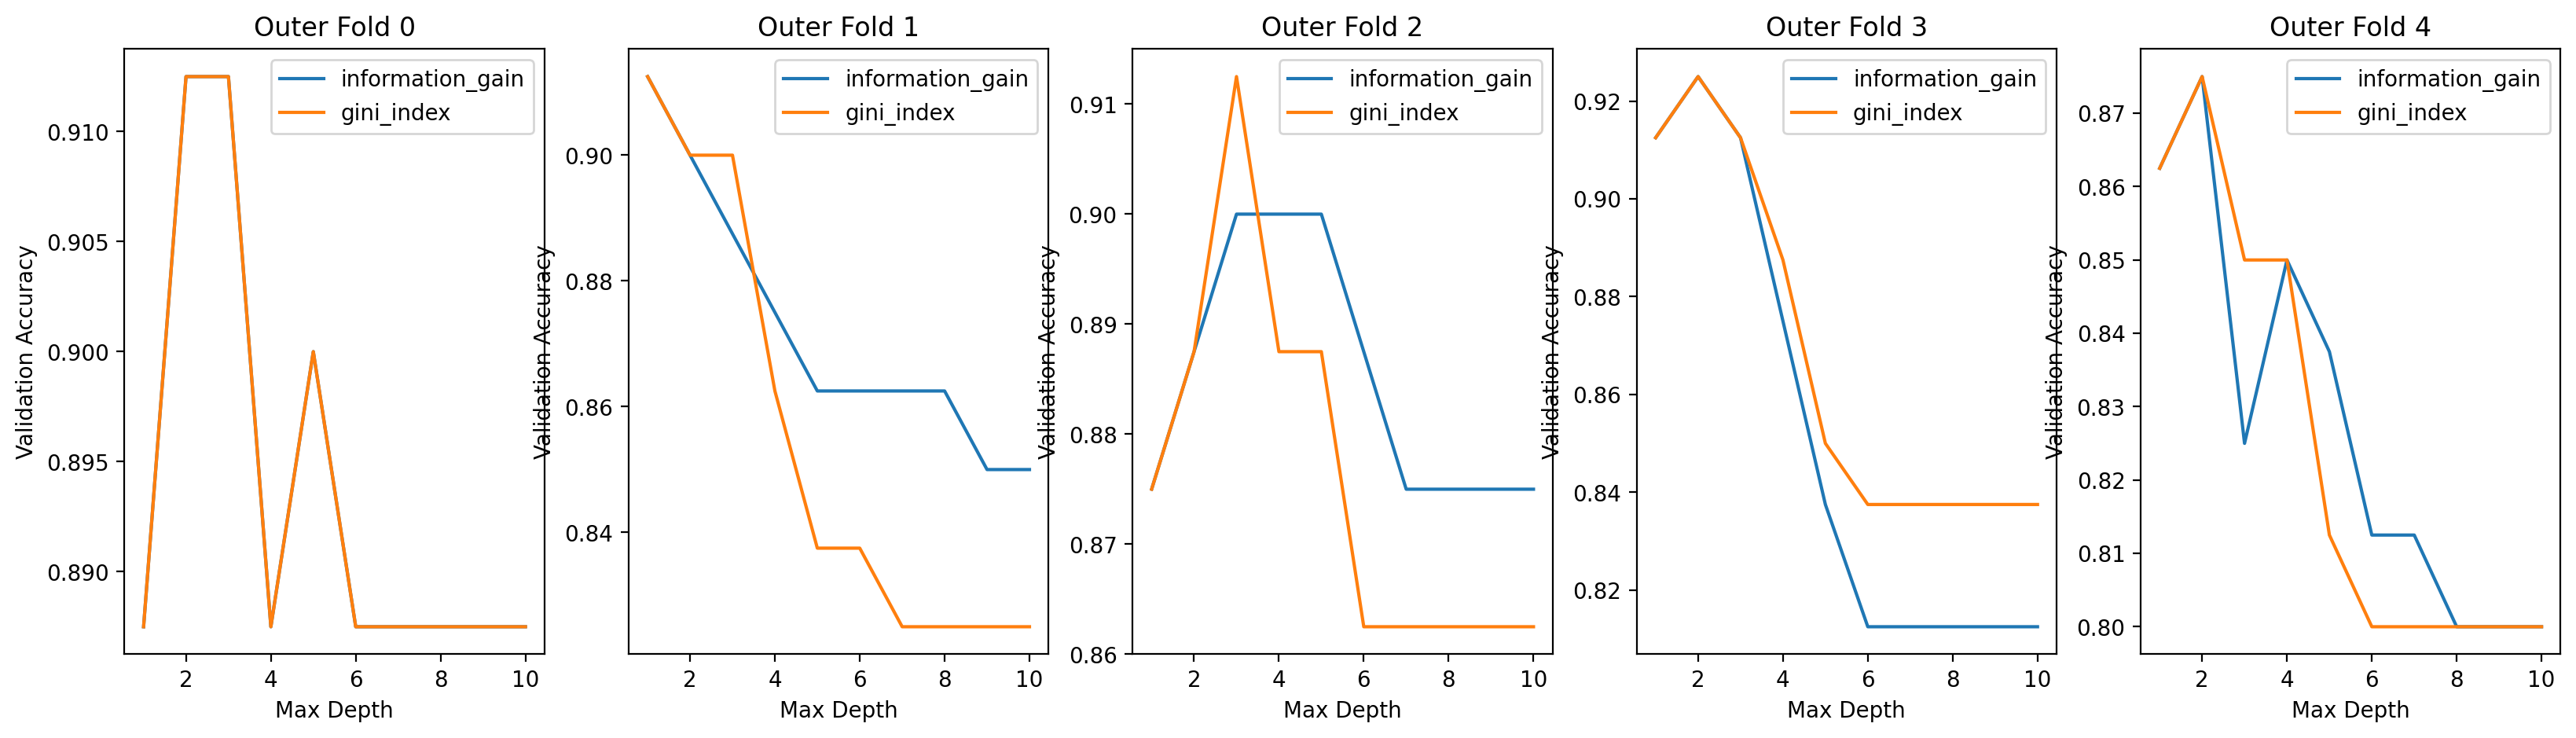

In [8]:
analyze_results(final_results, outer_folds, hyperparameters)

**From the above graphs and data, we can conclude that 2 is the most optimal depth for the decision tree.**